# Milestone 1:  Simple Vizualizations

## Args

In [94]:
cleaned_data_dir = "./data/teams/"

## Dependencies

In [95]:
import os

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Setup

In [100]:
plt.style.use('ggplot')

In [101]:
team_files = os.listdir(cleaned_data_dir)

plays = pd.concat([pd.read_csv(os.path.join(cleaned_data_dir, team_file)) for team_file in team_files])
plays.shape

(385076, 29)

In [102]:
with pd.option_context('display.max_rows', None):
    display(plays.sample(5).T)

,1663,7161,3182,6308,4355
id,91,285,447,685,65
event_index,78,161,228,315,31
game_id,2016020705,2018020320,2017020977,2018020048,2017020772
type,SHOT,SHOT,SHOT,SHOT,SHOT
secondary_type,Wrist Shot,Wrist Shot,Deflected,Slap Shot,Wrist Shot
description,Jakub Voracek Wrist Shot saved by Thomas Greiss,Tony DeAngelo Wrist Shot saved by Robin Lehner,Timo Meier Deflected saved by Cam Talbot,Jakub Vrana Slap Shot saved by Keith Kinkaid,Tyson Jost Wrist Shot saved by Jacob Markstrom
code,NYI91,NYR285,SJS447,NJD685,VAN65
period,1,2,3,3,1
period_type,REGULAR,REGULAR,REGULAR,REGULAR,REGULAR
time,14:57,04:19,01:41,13:53,06:23


## Q1: Shot Types

In [103]:
outcomes_by_shot_type_2017 = plays[plays['year']==2017].groupby(['type','secondary_type']).size().reset_index()
outcomes_by_shot_type_2017.columns = ['type', 'secondary_type', 'total']

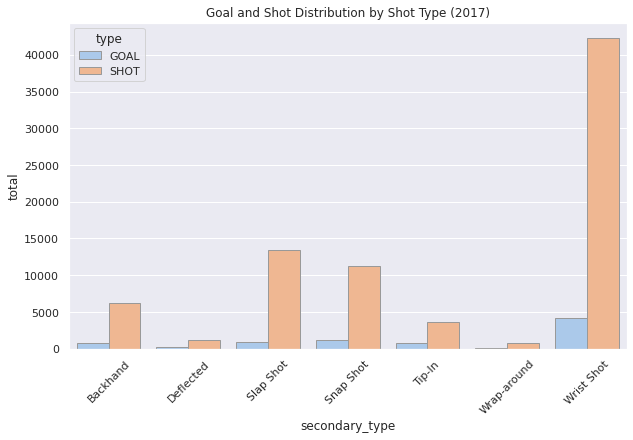

In [104]:
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='secondary_type', y='total', hue='type', data=outcomes_by_shot_type_2017,
            palette="pastel", edgecolor=".6")

plt.title("Goal and Shot Distribution by Shot Type (2017)");
plt.xticks(rotation=45);

In [105]:
outcomes_by_shot_type_2017 = outcomes_by_shot_type_2017.pivot("secondary_type", "type", "total")
outcomes_by_shot_type_2017['goal_rate'] = \
    outcomes_by_shot_type_2017['GOAL'] / \
    (outcomes_by_shot_type_2017['GOAL'] + outcomes_by_shot_type_2017['SHOT'])

outcomes_by_shot_type_2017.sort_values('goal_rate', ascending=False)

type,GOAL,SHOT,goal_rate
secondary_type,,,
Deflected,262,1188,0.180690
Tip-In,760,3689,0.170825
Backhand,808,6270,0.114157
Snap Shot,1168,11297,0.093702
Wrist Shot,4240,42280,0.091144
Wrap-around,60,833,0.067189
Slap Shot,889,13390,0.062259


## Q2: Goal by Distance

## Q3:  Putting it Together